# Q2

## part a

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [14]:
housing = fetch_california_housing()
n_features = housing.data.shape[1]

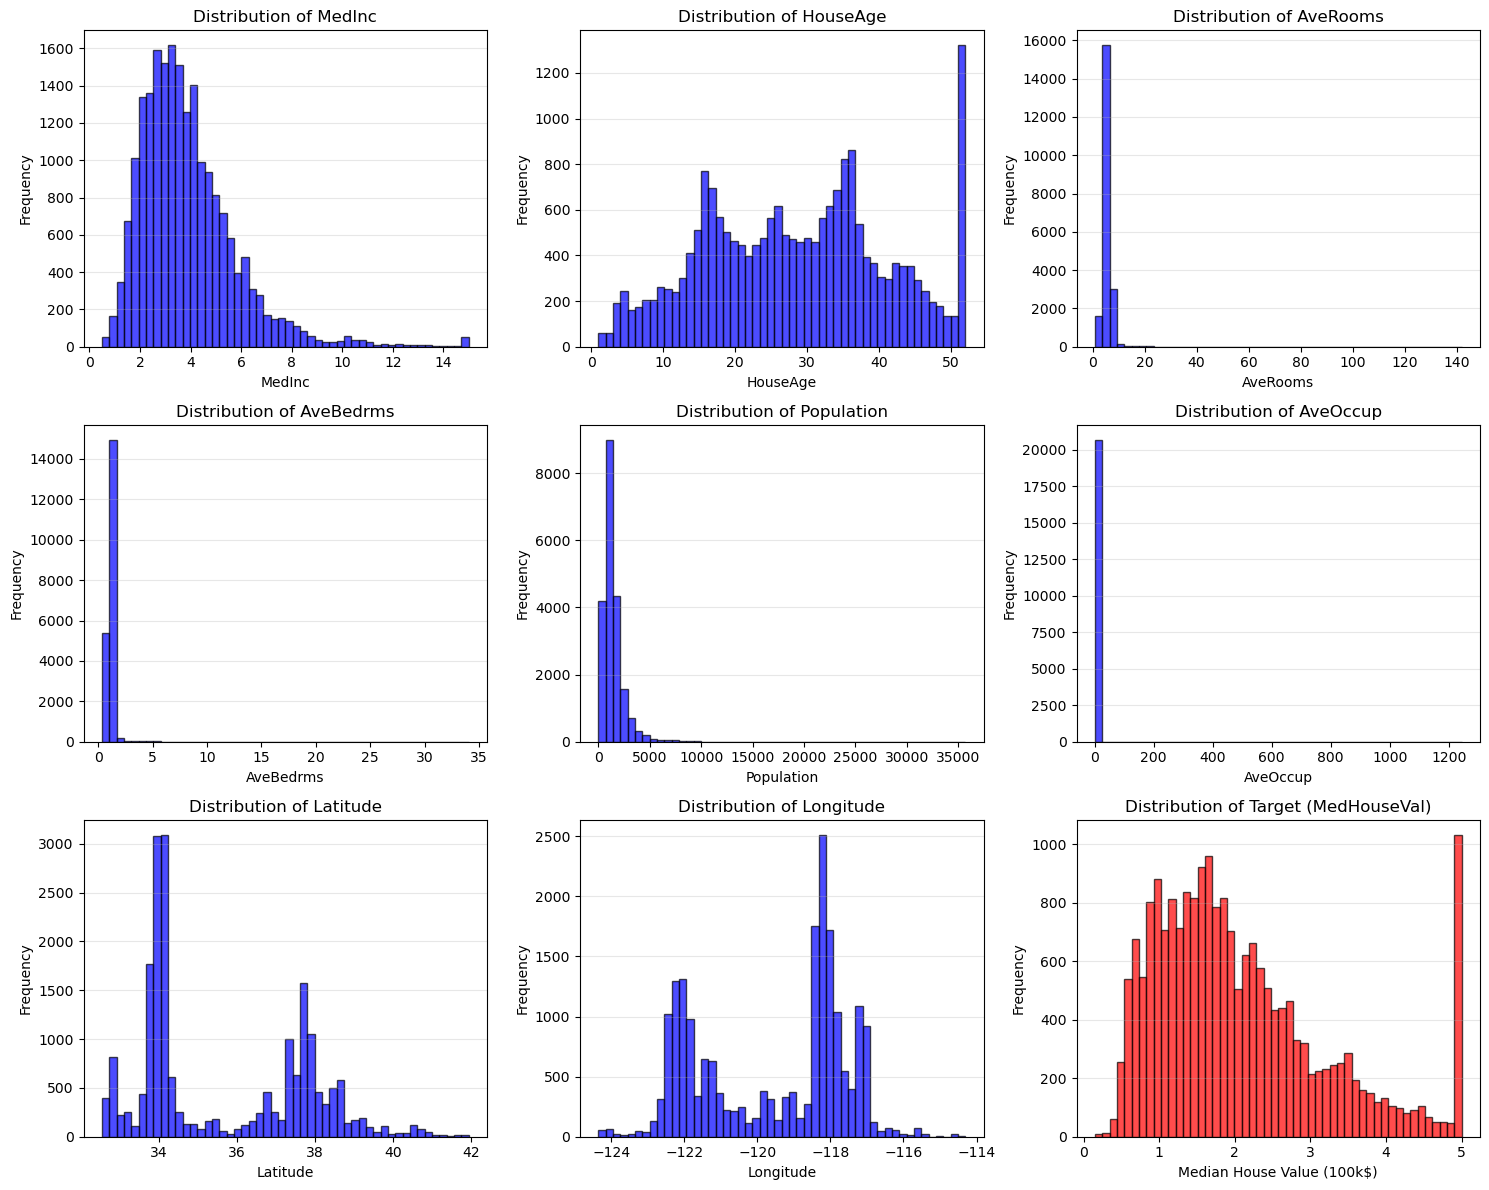

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i in range(n_features):
    axes[i].hist(housing.data[:, i], bins=50, color='blue', 
                 edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(housing.feature_names[i])
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {housing.feature_names[i]}')
    axes[i].grid(axis='y', alpha=0.3)

axes[n_features].hist(housing.target, bins=50, color='red', 
                      edgecolor='black', alpha=0.7)
axes[n_features].set_xlabel('Median House Value (100k$)')
axes[n_features].set_ylabel('Frequency')
axes[n_features].set_title('Distribution of Target (MedHouseVal)')
axes[n_features].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## part b

In [16]:
X = housing.data
feature_names = housing.feature_names

df_original = pd.DataFrame(X, columns=feature_names)

In [17]:
# Min-Max normalization to [0, 1]
X_min = X.min(axis=0)
X_max = X.max(axis=0)
df_01 = pd.DataFrame((X - X_min) / (X_max - X_min), columns=feature_names)

In [18]:
# Min-Max normalization to [-1, 1]
df_11 = pd.DataFrame(((X - X_min) / (X_max - X_min)) * 2 - 1, columns=feature_names)

In [19]:
# 3. Standard Scaling (Z-score)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
df_standard = pd.DataFrame((X - X_mean) / X_std, columns=feature_names)

In [20]:
# 4. Robust Scaling
X_median = np.median(X, axis=0)
X_Q1 = np.percentile(X, 25, axis=0)
X_Q3 = np.percentile(X, 75, axis=0)
IQR = X_Q3 - X_Q1
df_robust = pd.DataFrame((X - X_median) / IQR, columns=feature_names)

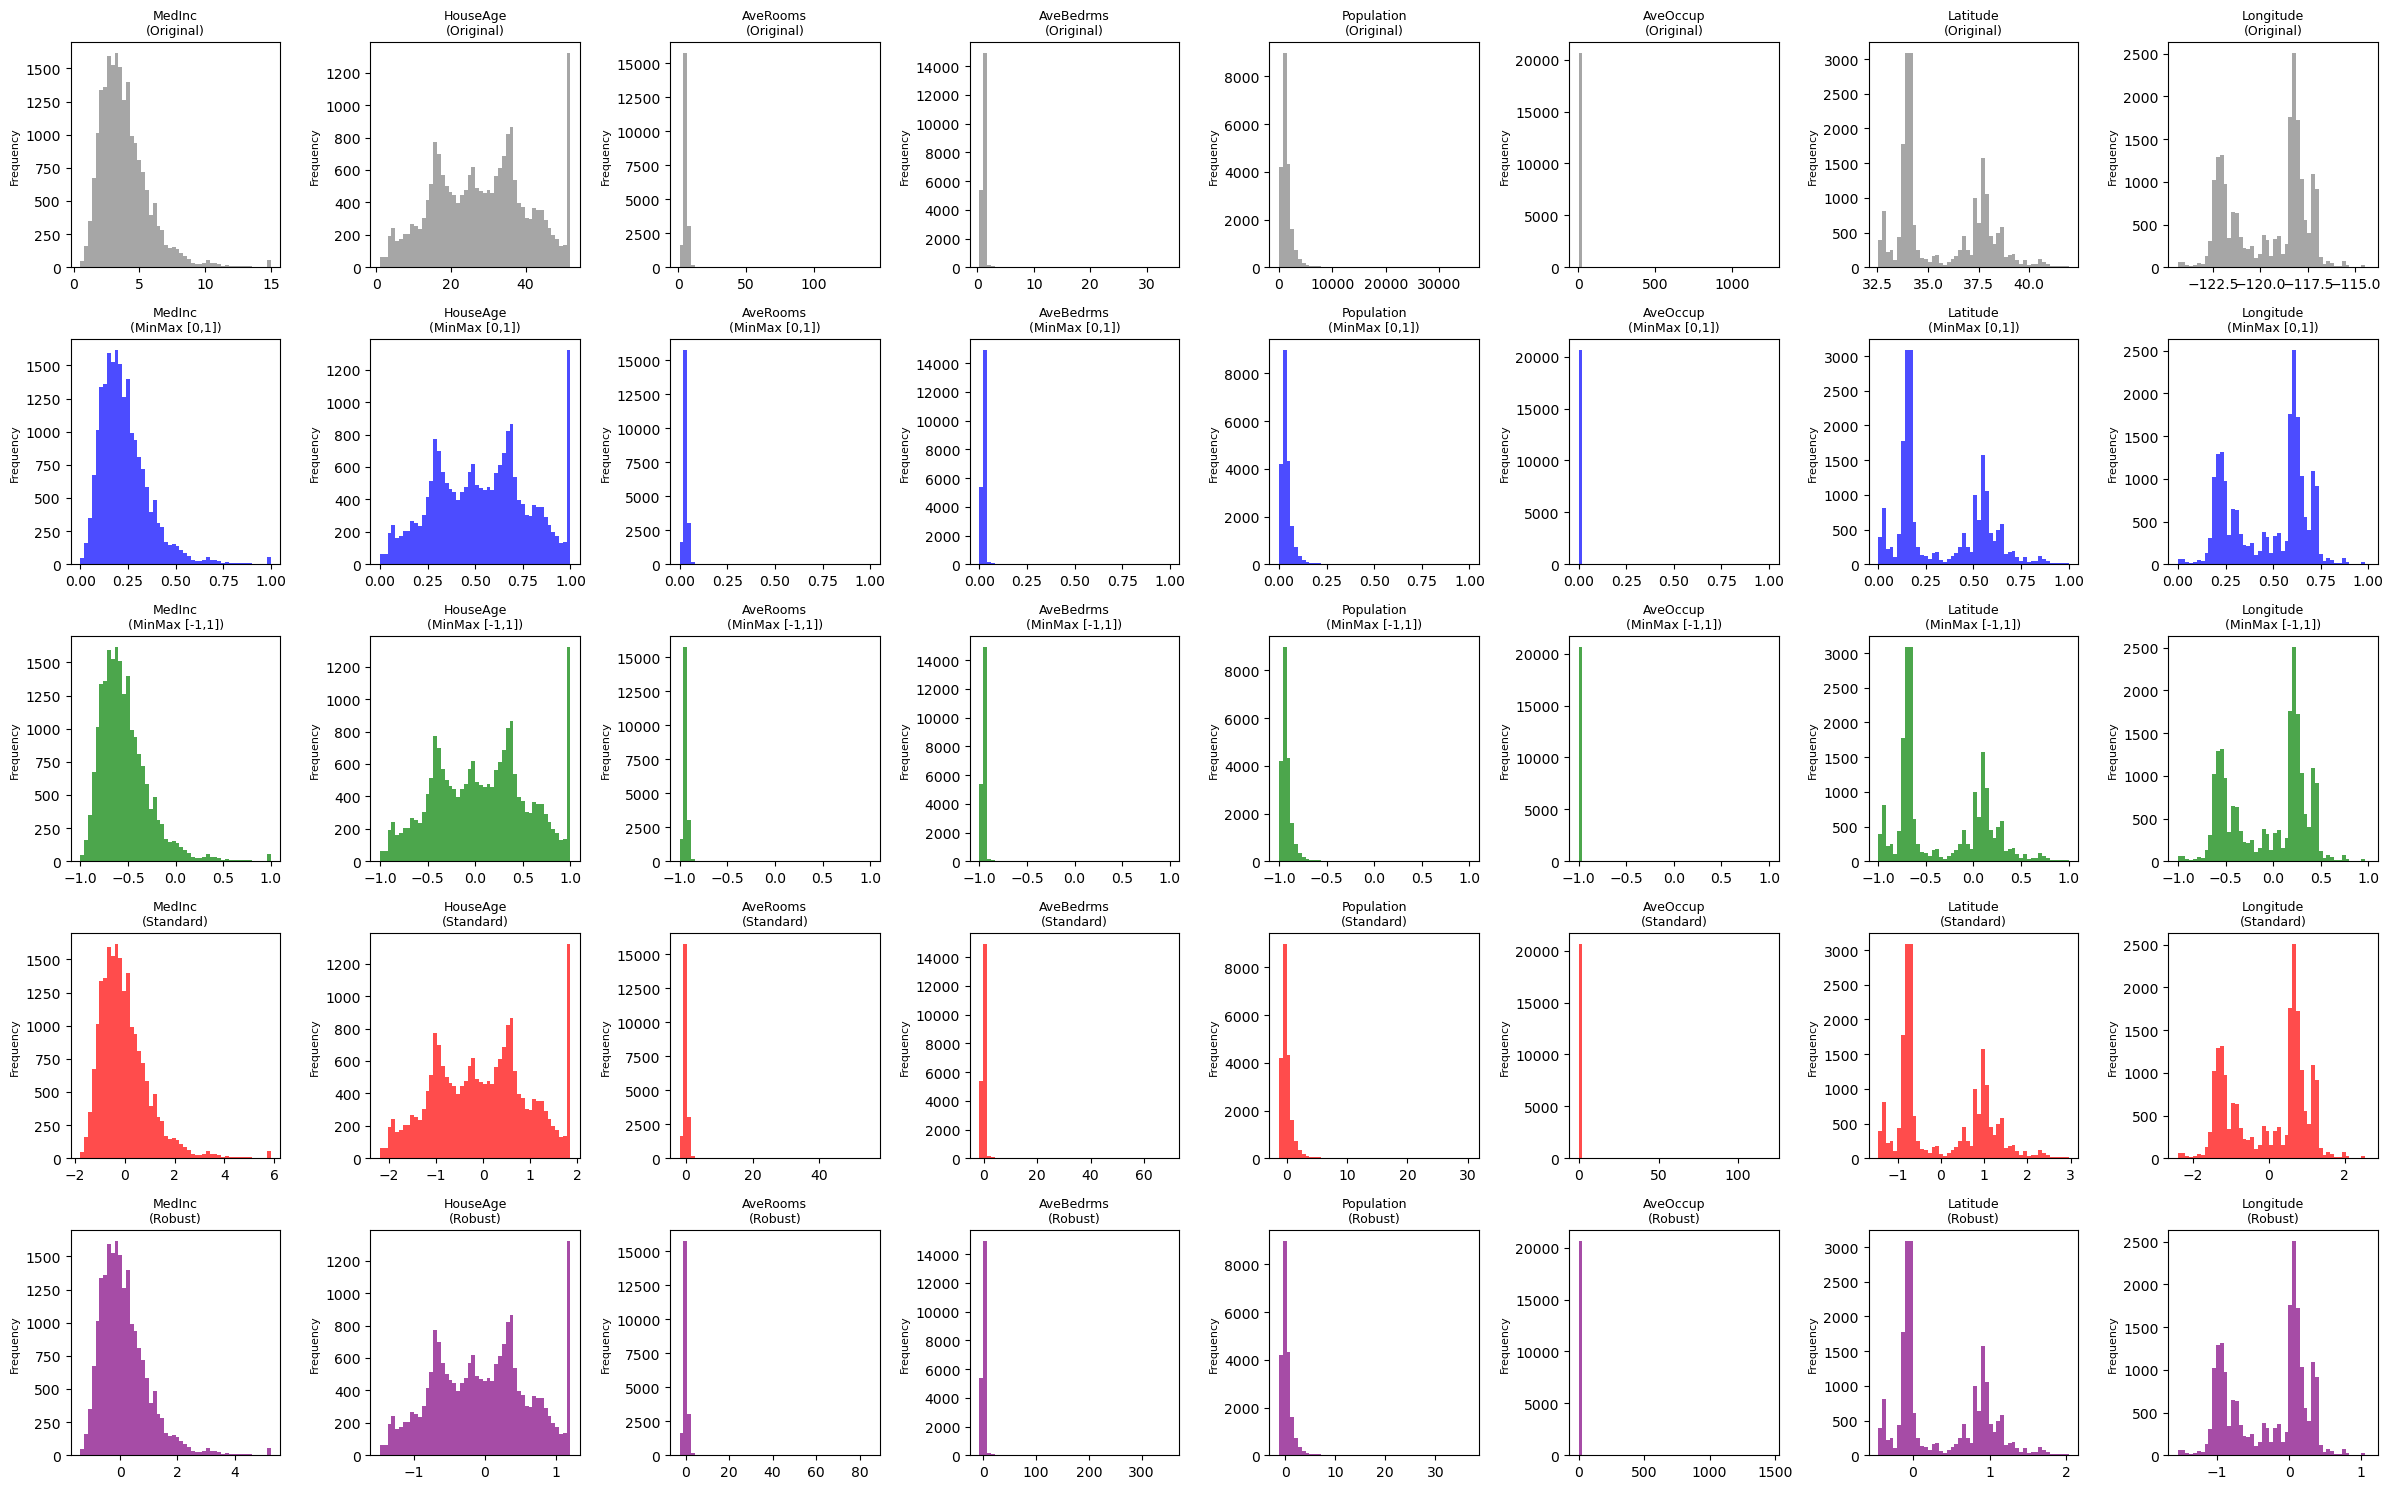

In [21]:
fig, axes = plt.subplots(5, 8, figsize=(24, 15))

for i, feature in enumerate(feature_names):
    # Original
    axes[0, i].hist(df_original[feature], bins=50, color='gray', alpha=0.7)
    axes[0, i].set_title(f'{feature}\n(Original)', fontsize=9)
    axes[0, i].set_ylabel('Frequency', fontsize=8)
    
    # Min-Max [0, 1]
    axes[1, i].hist(df_01[feature], bins=50, color='blue', alpha=0.7)
    axes[1, i].set_title(f'{feature}\n(MinMax [0,1])', fontsize=9)
    axes[1, i].set_ylabel('Frequency', fontsize=8)
    
    # Min-Max [-1, 1]
    axes[2, i].hist(df_11[feature], bins=50, color='green', alpha=0.7)
    axes[2, i].set_title(f'{feature}\n(MinMax [-1,1])', fontsize=9)
    axes[2, i].set_ylabel('Frequency', fontsize=8)
    
    # Standard Scaling
    axes[3, i].hist(df_standard[feature], bins=50, color='red', alpha=0.7)
    axes[3, i].set_title(f'{feature}\n(Standard)', fontsize=9)
    axes[3, i].set_ylabel('Frequency', fontsize=8)
    
    # Robust Scaling
    axes[4, i].hist(df_robust[feature], bins=50, color='purple', alpha=0.7)
    axes[4, i].set_title(f'{feature}\n(Robust)', fontsize=9)
    axes[4, i].set_ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()

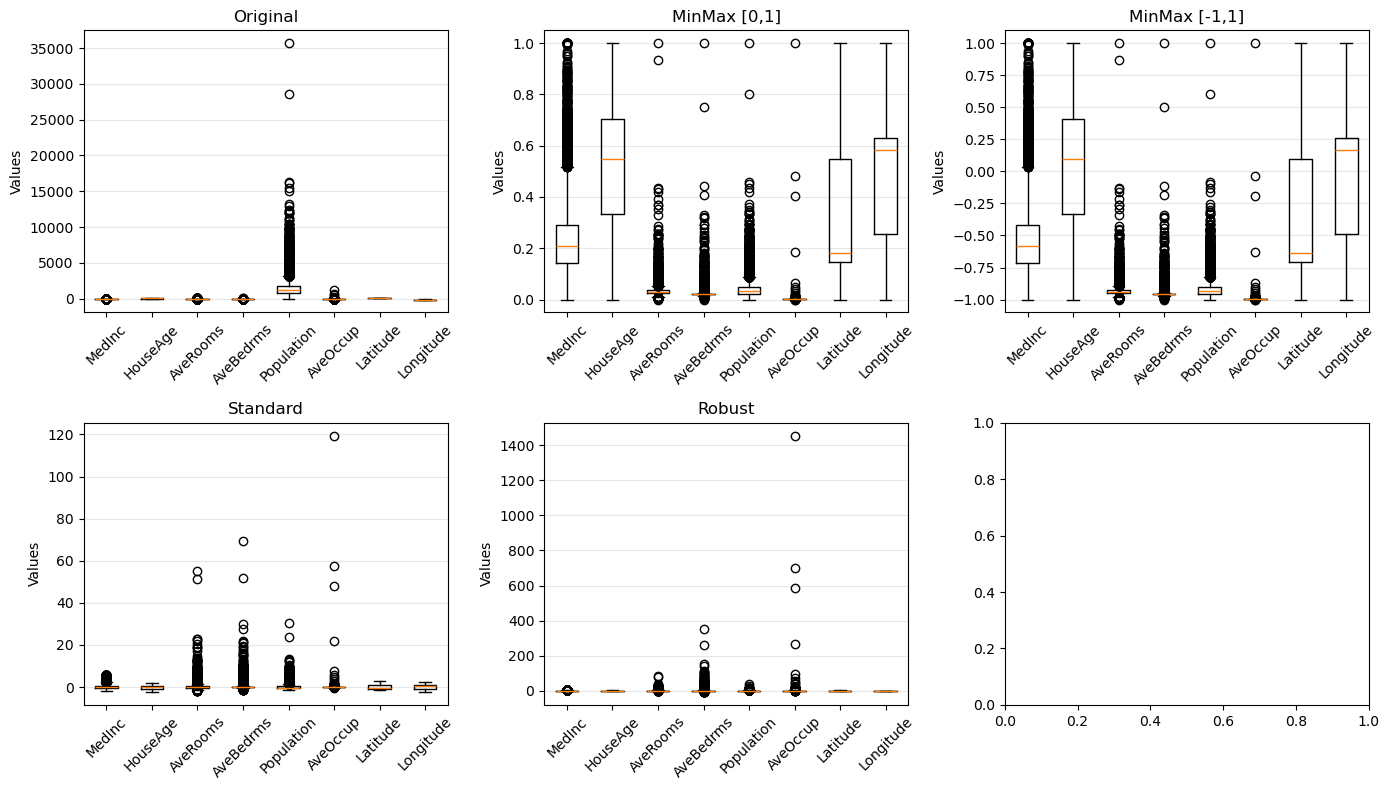

In [22]:
# Box plots to compare outlier handling
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

methods = [
    (df_original, 'Original'),
    (df_01, 'MinMax [0,1]'),
    (df_11, 'MinMax [-1,1]'),
    (df_standard, 'Standard'),
    (df_robust, 'Robust')
]

for idx, (df, title) in enumerate(methods):
    axes[idx].boxplot([df[col].values for col in feature_names], 
                      tick_labels=feature_names)
    axes[idx].set_title(title, fontsize=12)
    axes[idx].set_ylabel('Values', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
# Detailed comparison for one feature (e.g., MedInc)
print("="*80)
print("DETAILED COMPARISON FOR 'MedInc' FEATURE")
print("="*80)

comparison_df = pd.DataFrame({
    'Original': df_original['MedInc'][:10],
    'MinMax[0,1]': df_01['MedInc'][:10],
    'MinMax[-1,1]': df_11['MedInc'][:10],
    'Standard': df_standard['MedInc'][:10],
    'Robust': df_robust['MedInc'][:10]
})

print(comparison_df)
print("\n")

DETAILED COMPARISON FOR 'MedInc' FEATURE
   Original  MinMax[0,1]  MinMax[-1,1]  Standard    Robust
0    8.3252     0.539668      0.079337  2.344766  2.197582
1    8.3014     0.538027      0.076054  2.332238  2.186664
2    7.2574     0.466028     -0.067944  1.782699  1.707732
3    5.6431     0.354699     -0.290603  0.932968  0.967177
4    3.8462     0.230776     -0.538448 -0.012881  0.142854
5    4.0368     0.243921     -0.512158  0.087447  0.230291
6    3.6591     0.217873     -0.564254 -0.111366  0.057022
7    3.1200     0.180694     -0.638612 -0.395137 -0.190288
8    2.0804     0.108998     -0.782003 -0.942359 -0.667202
9    3.6912     0.220087     -0.559827 -0.094470  0.071748




In [24]:
# Statistical comparison
print("="*80)
print("STATISTICAL COMPARISON ACROSS ALL FEATURES")
print("="*80)

stats_comparison = pd.DataFrame({
    'Method': ['Original', 'MinMax[0,1]', 'MinMax[-1,1]', 'Standard', 'Robust'],
    'Mean_Range': [
        f"[{df_original.mean().min():.2f}, {df_original.mean().max():.2f}]",
        f"[{df_01.mean().min():.4f}, {df_01.mean().max():.4f}]",
        f"[{df_11.mean().min():.4f}, {df_11.mean().max():.4f}]",
        f"[{df_standard.mean().min():.2e}, {df_standard.mean().max():.2e}]",
        f"[{df_robust.mean().min():.4f}, {df_robust.mean().max():.4f}]"
    ],
    'Std_Range': [
        f"[{df_original.std().min():.2f}, {df_original.std().max():.2f}]",
        f"[{df_01.std().min():.4f}, {df_01.std().max():.4f}]",
        f"[{df_11.std().min():.4f}, {df_11.std().max():.4f}]",
        f"[{df_standard.std().min():.4f}, {df_standard.std().max():.4f}]",
        f"[{df_robust.std().min():.4f}, {df_robust.std().max():.4f}]"
    ],
    'Min_Value': [
        f"{df_original.min().min():.2f}",
        f"{df_01.min().min():.4f}",
        f"{df_11.min().min():.4f}",
        f"{df_standard.min().min():.2f}",
        f"{df_robust.min().min():.2f}"
    ],
    'Max_Value': [
        f"{df_original.max().max():.2f}",
        f"{df_01.max().max():.4f}",
        f"{df_11.max().max():.4f}",
        f"{df_standard.max().max():.2f}",
        f"{df_robust.max().max():.2f}"
    ]
})

print(stats_comparison.to_string(index=False))

STATISTICAL COMPARISON ACROSS ALL FEATURES
      Method            Mean_Range         Std_Range Min_Value Max_Value
    Original    [-119.57, 1425.48]   [0.47, 1132.46]   -124.35  35682.00
 MinMax[0,1]      [0.0019, 0.5420]  [0.0084, 0.2468]    0.0000    1.0000
MinMax[-1,1]     [-0.9962, 0.0839]  [0.0167, 0.4936]   -1.0000    1.0000
    Standard [-8.53e-15, 6.61e-17]  [1.0000, 1.0000]     -2.39    119.42
      Robust     [-0.2849, 0.5125] [0.5286, 12.1828]     -7.66   1455.12
